In [6]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [16]:
# data=pd.read_csv(r"~Sourav Rawat\Downloads\credit_card_approval.csv")

In [7]:
data = pd.read_csv('credit_card_approval.csv')

In [8]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.000000,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.000000,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.000000,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.000000,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.000000,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [9]:
data.shape

(537667, 19)

In [95]:
# There is No Missing Value 
#data appears to be cleaned. no missing values found!

In [114]:
data.isnull().sum()

CODE_GENDER            0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

In [96]:
#we are dropping the features that can cause multicolinearity 
#we did it through countplot and found that within the
#the features the classes were imbalance
#these dropped features make no sense with credit card approval

In [26]:
data.describe(include=object).T

,count,unique,top,freq
CODE_GENDER,537667,2,F,333832
FLAG_OWN_CAR,537667,2,N,306207
FLAG_OWN_REALTY,537667,2,Y,345471
CNT_CHILDREN,537667,3,No children,343151
NAME_EDUCATION_TYPE,537667,5,Secondary / secondary special,358317
NAME_FAMILY_STATUS,537667,5,Married,384003
NAME_HOUSING_TYPE,537667,6,House / apartment,474177
JOB,537667,18,Laborers,131572
STATUS,537667,8,C,226185


In [29]:
data.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
ID,537667.000000,5079231.308957,42001.999788,5008806.000000,5044925.000000,5079091.000000,5115755.000000,5150487.000000
AMT_INCOME_TOTAL,537667.000000,197117.126677,104138.963465,27000.000000,135000.000000,180000.000000,229500.000000,1575000.000000
DAYS_BIRTH,537667.000000,-15010.958999,3416.418092,-24611.000000,-17594.000000,-14785.000000,-12239.000000,-7489.000000
DAYS_EMPLOYED,537667.000000,-2762.029935,2393.919456,-15713.000000,-3661.000000,-2147.000000,-1050.000000,-17.000000
FLAG_MOBIL,537667.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FLAG_WORK_PHONE,537667.000000,0.281615,0.449787,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_PHONE,537667.000000,0.298893,0.457773,0.000000,0.000000,0.000000,1.000000,1.000000
FLAG_EMAIL,537667.000000,0.100730,0.300971,0.000000,0.000000,0.000000,0.000000,1.000000
BEGIN_MONTHS,537667.000000,-19.305241,14.037827,-60.000000,-29.000000,-17.000000,-8.000000,0.000000
TARGET,537667.000000,0.003649,0.060298,0.000000,0.000000,0.000000,0.000000,1.000000


In [17]:
data.columns.unique()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'JOB', 'BEGIN_MONTHS',
       'STATUS', 'TARGET'],
      dtype='object')

# UNIVARIATE ANALYSIS 

In [49]:
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE',
       'FLAG_EMAIL', 'BEGIN_MONTHS'],
      dtype='object')

In [13]:
cat_cols = data.select_dtypes(include=object).columns
cat_cols

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'JOB',
       'STATUS'],
      dtype='object')

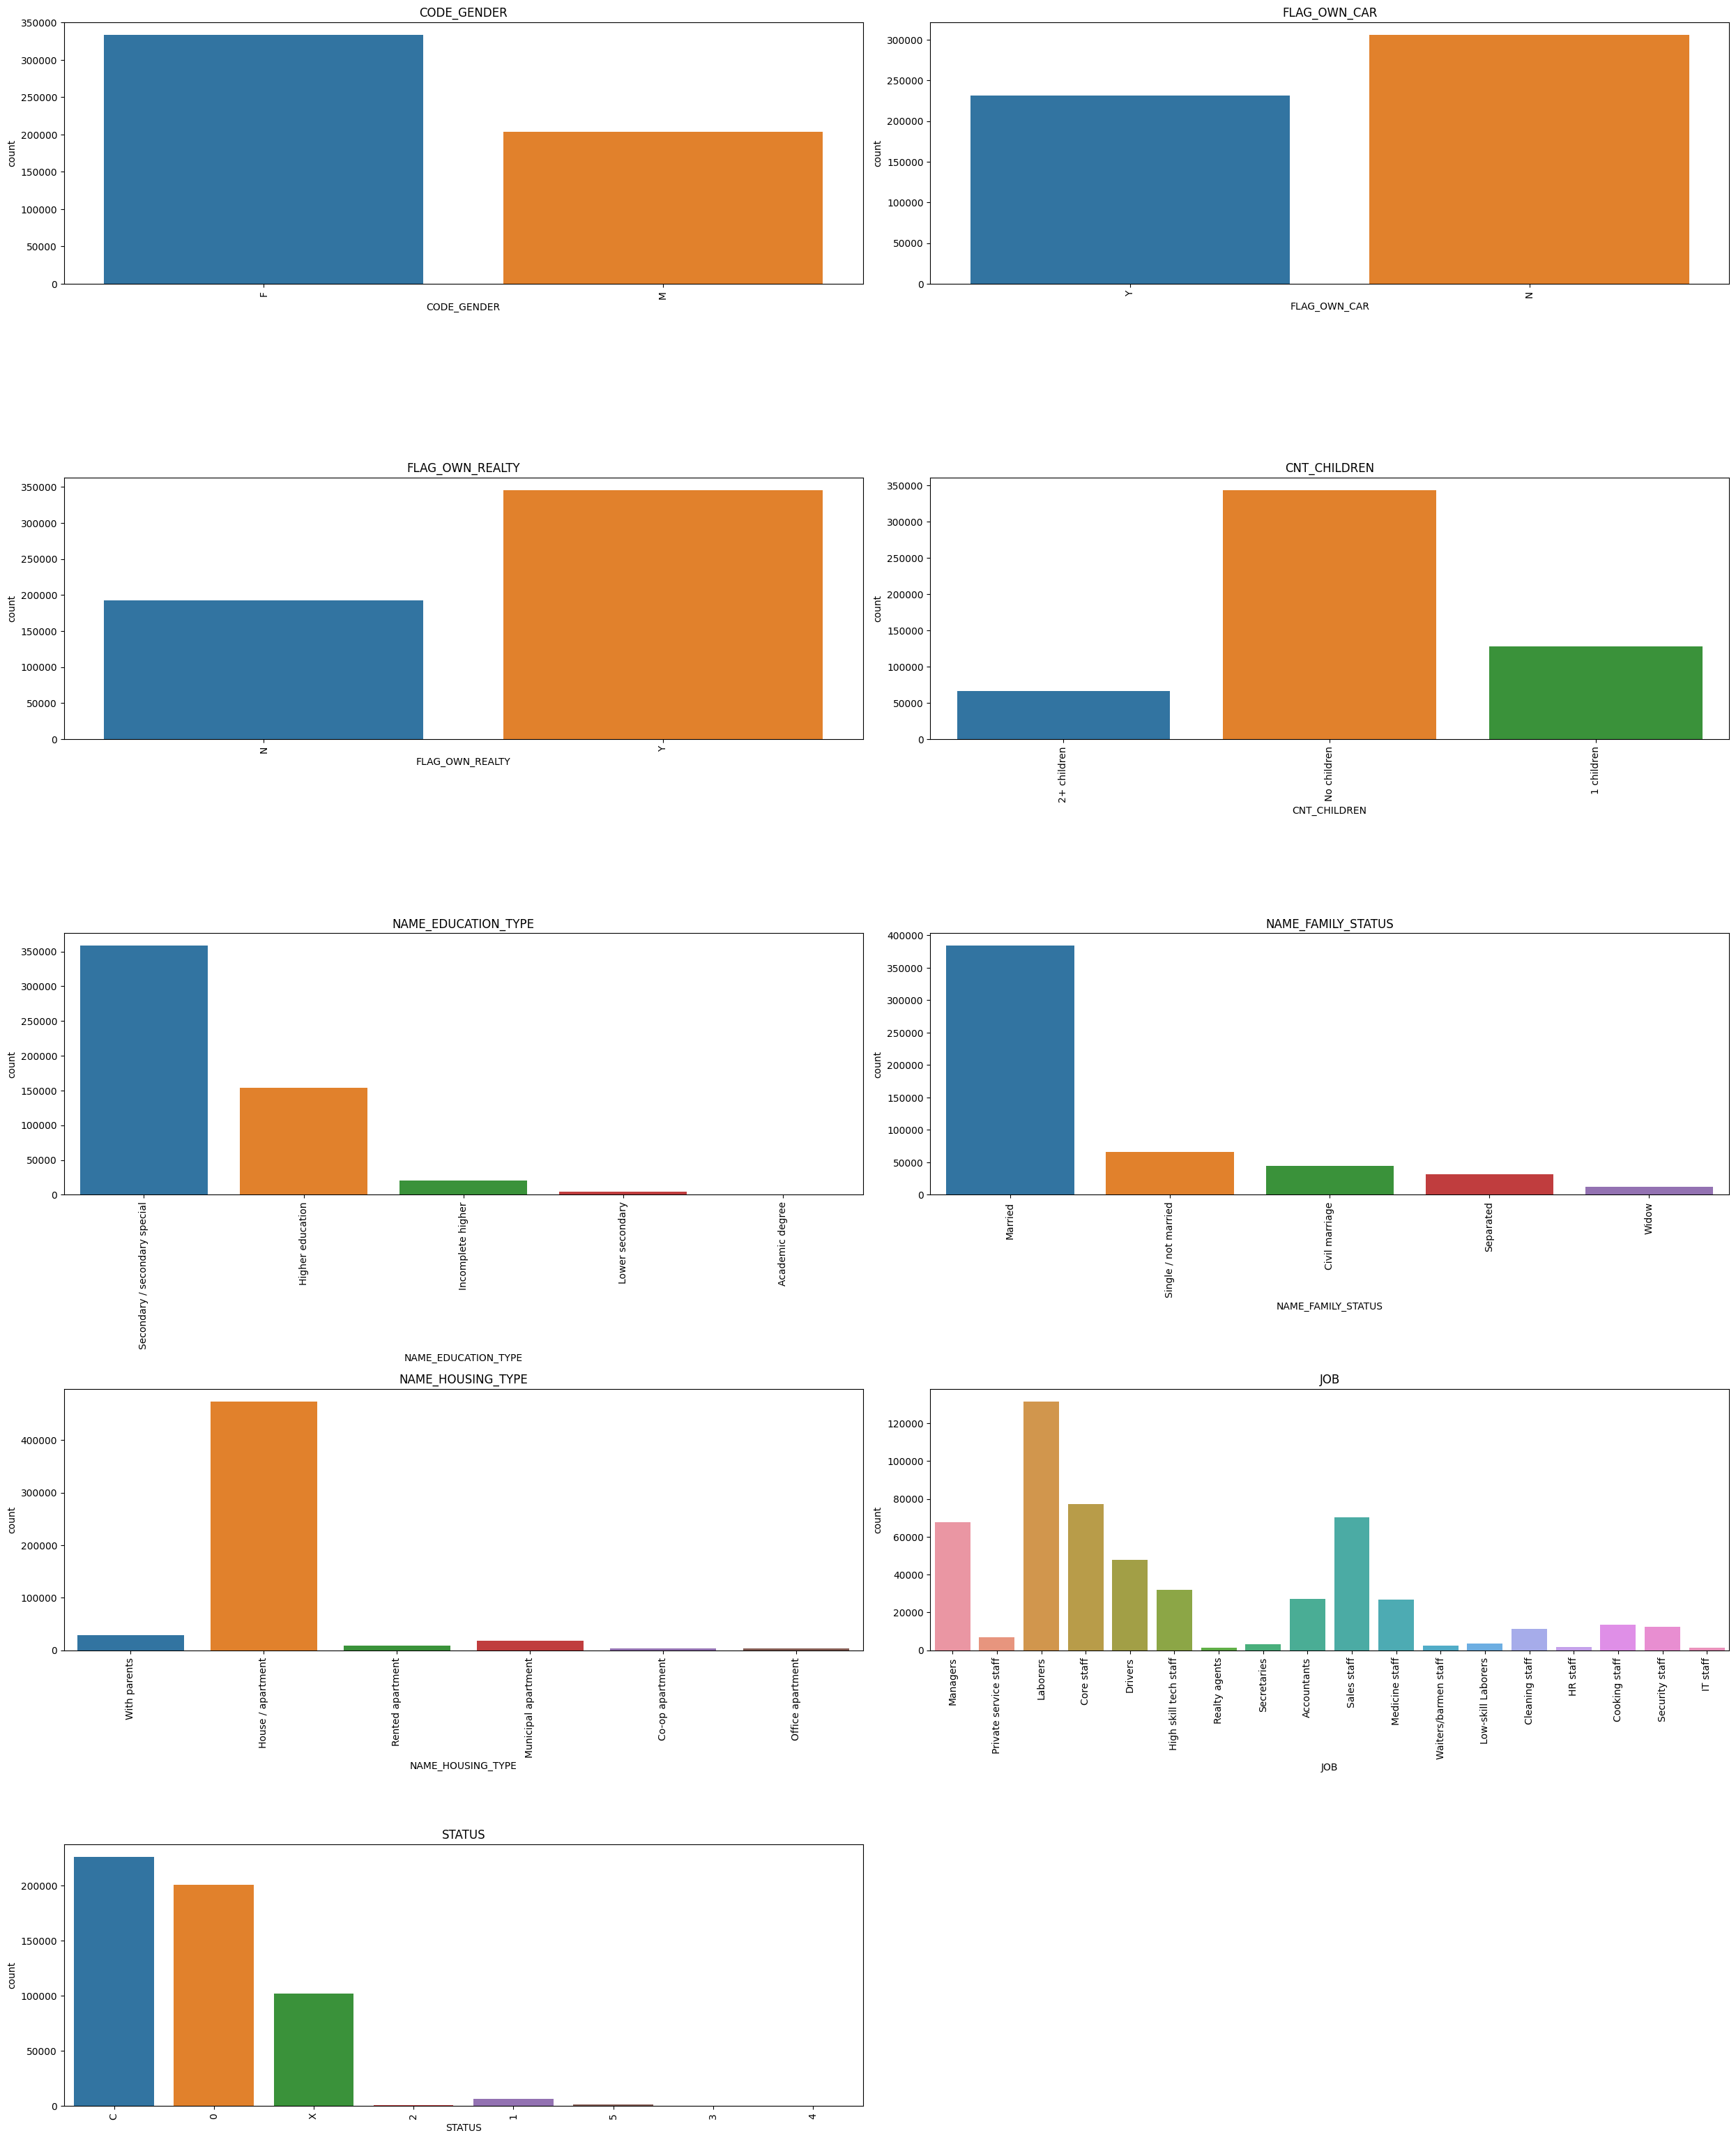

In [34]:
plt.rcParams['figure.figsize']=[25,50]

r=8
c=2
i=1

for j in cat_cols:
    plt.subplot(r,c,i)
    sns.countplot(x=data.loc[:,j])
    i+=1
    plt.title(j)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

In [ ]:
# INFERENCES :- 


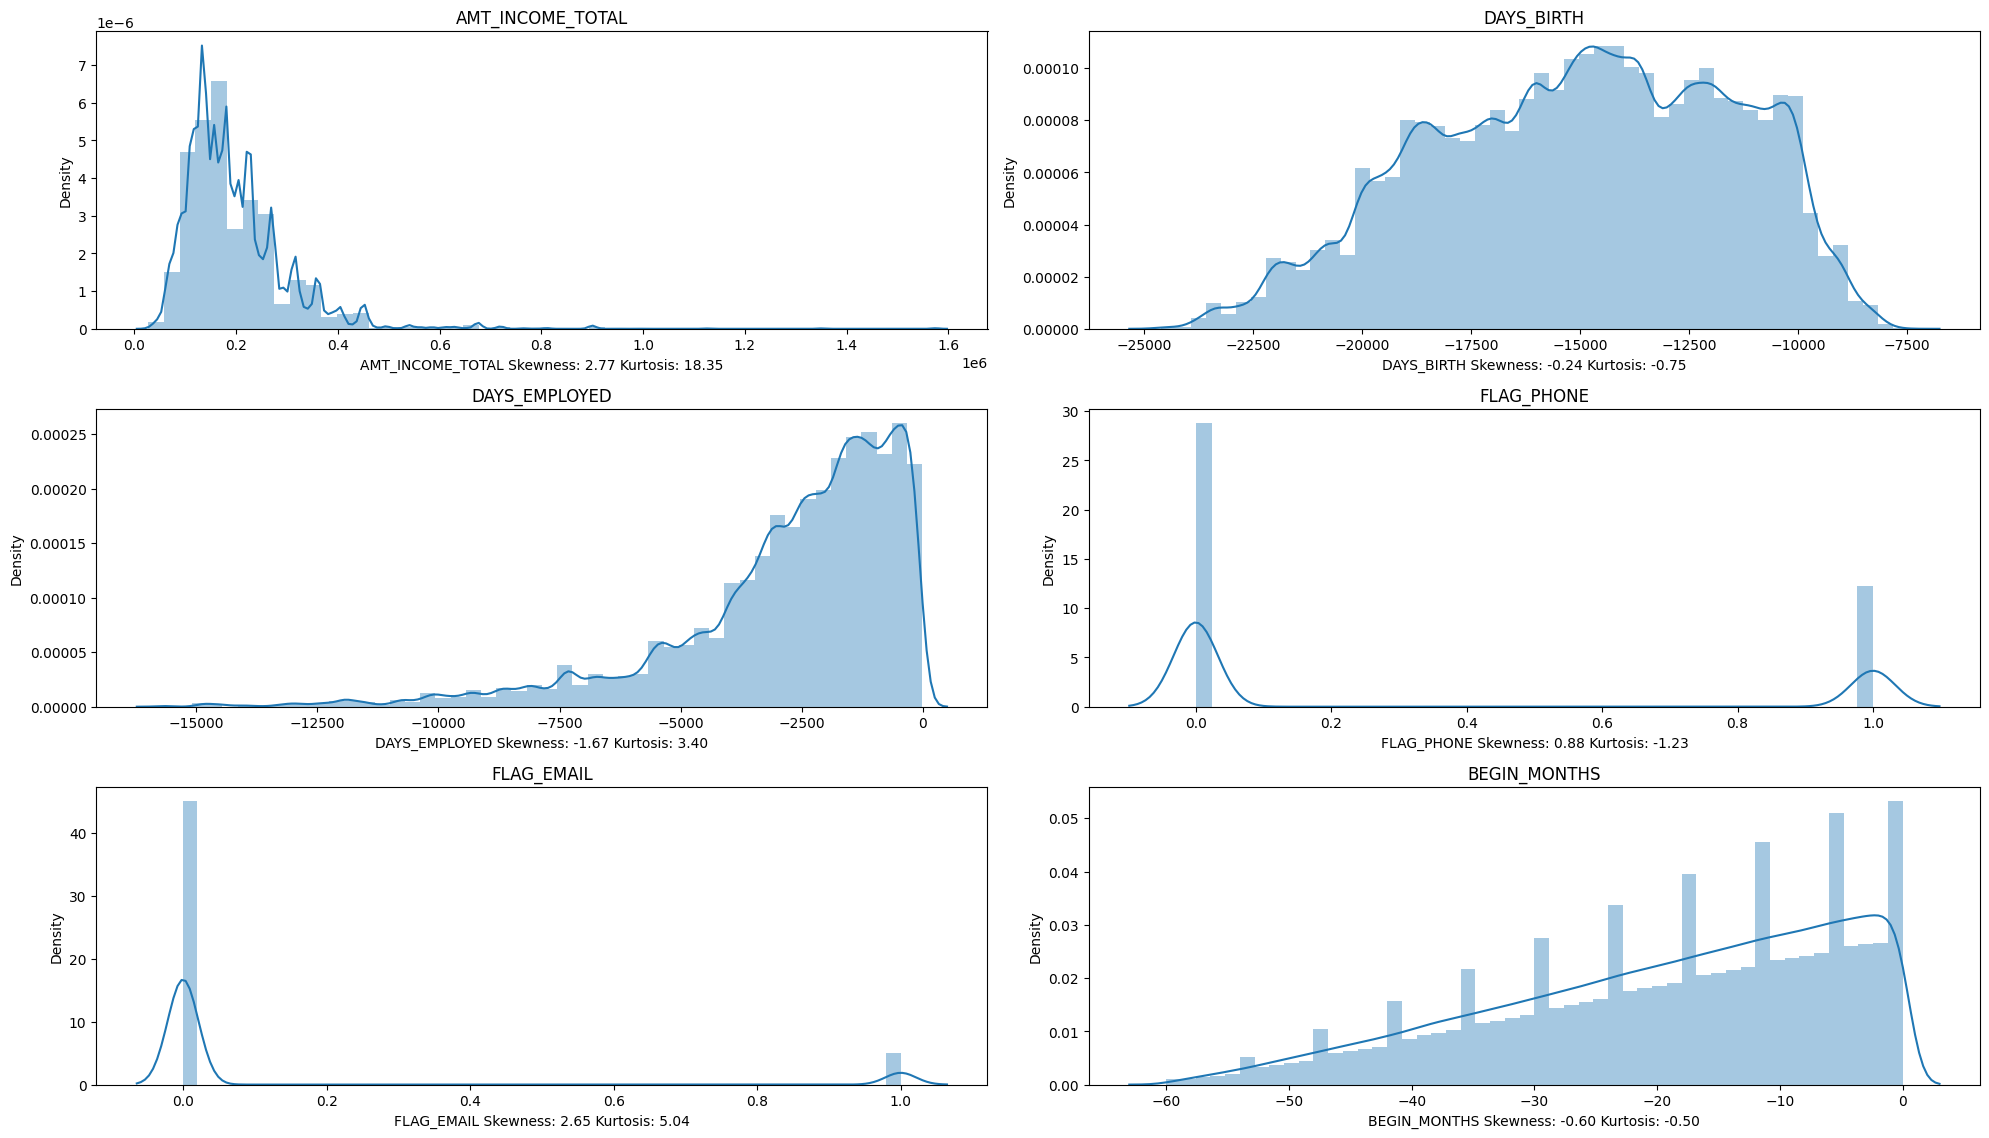

In [50]:
plt.rcParams['figure.figsize']=[20,200]

rows=53
columns=2
iterator=1

for i in num_cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(data.loc[:,i].dropna())
    plt.xlabel("%s Skewness: %.2f Kurtosis: %.2f"%(i,data[i].skew(),data[i].kurt())) # Formatt Specifie
    iterator+=1 
    plt.title(i)

plt.tight_layout()    
plt.show()

In [ ]:
# INFERENCES :-

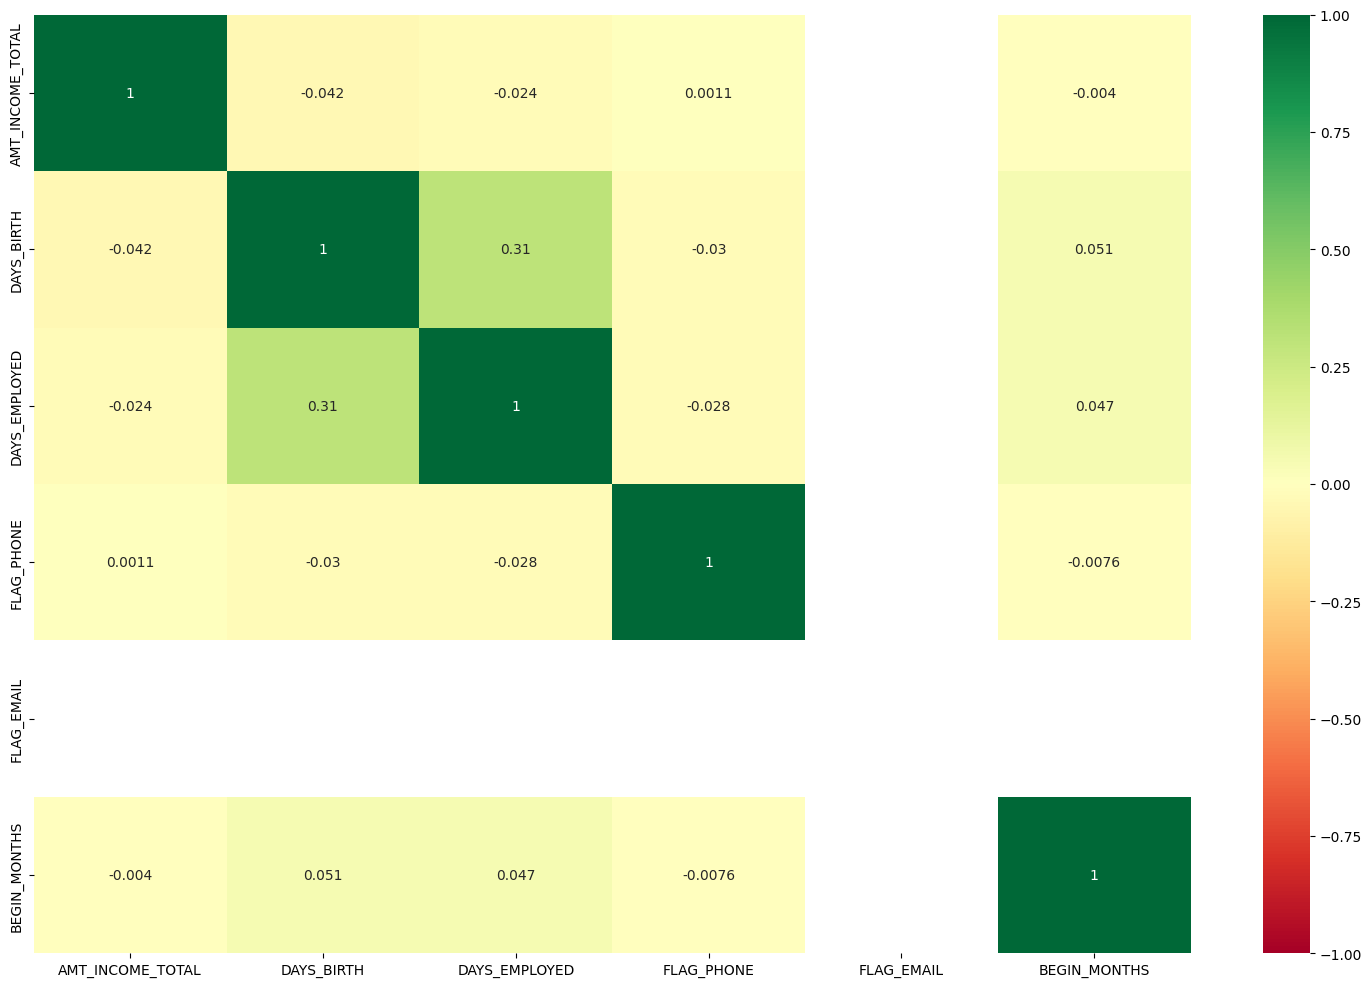

In [100]:
# Correlation Matrix 
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='RdYlGn')
plt.tight_layout()
plt.show()

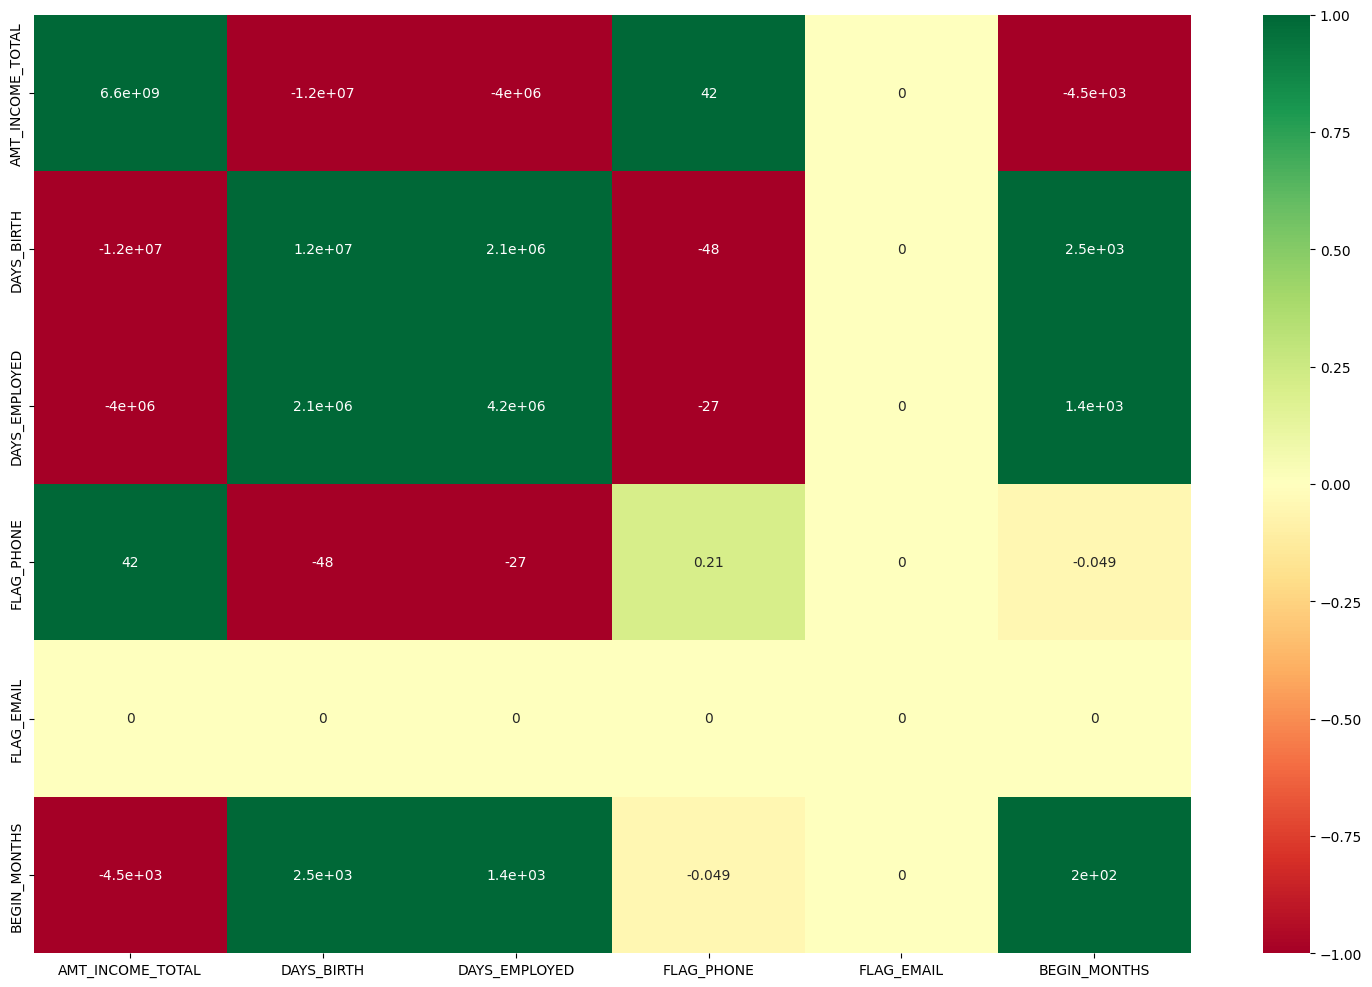

In [103]:
# Covariance Table
plt.figure(figsize=(15,10))

sns.heatmap(data.cov(),annot=True,vmin=-1,vmax=1,cmap='RdYlGn')
plt.tight_layout()
plt.show()

In [22]:
# Checking Duplicates 
data.duplicated().sum()

0

# BIVARIATE ANALYSIS :-

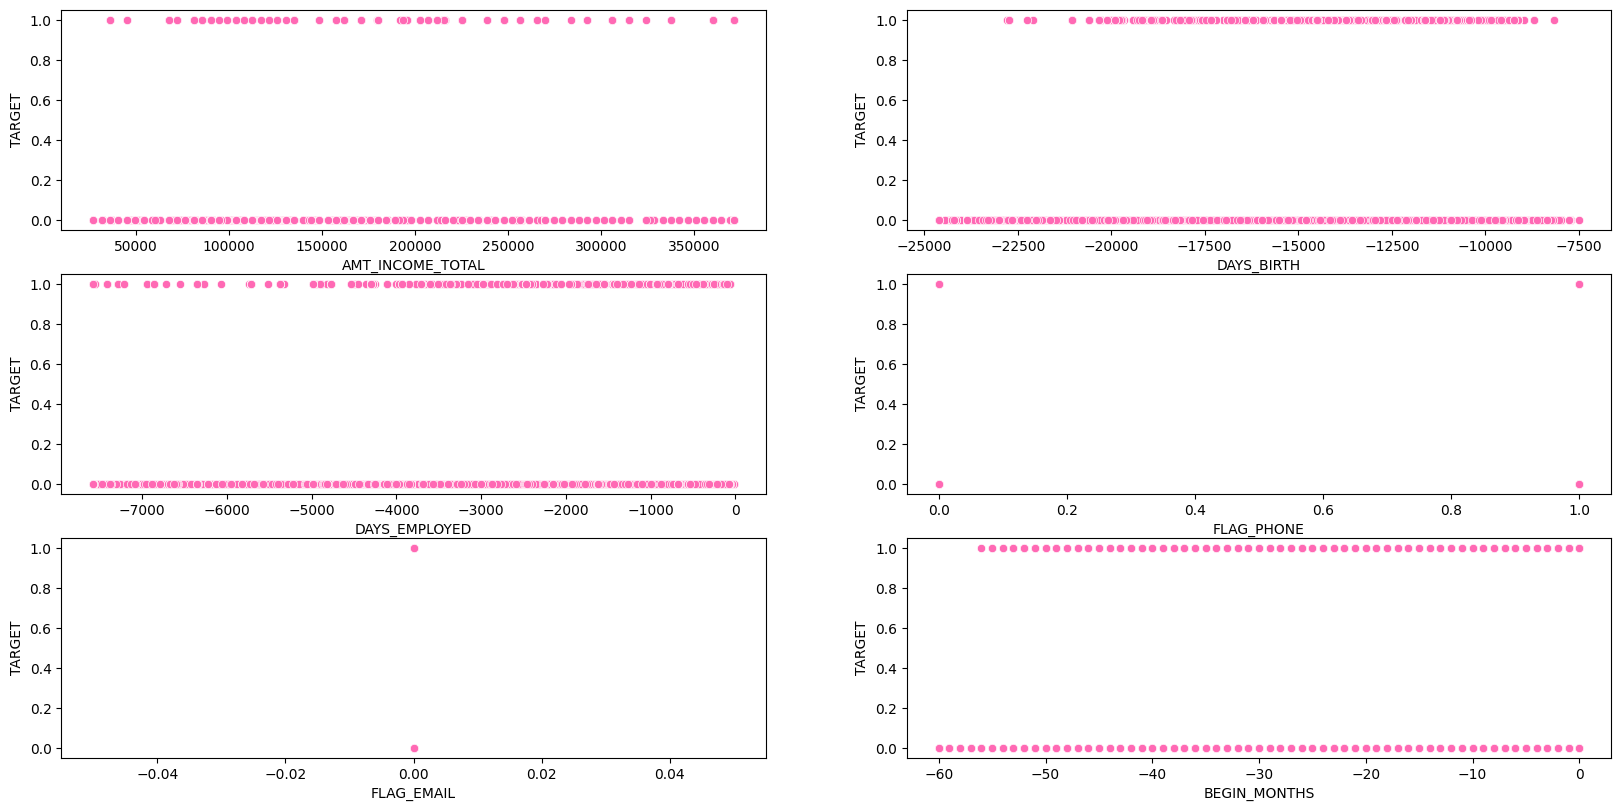

In [87]:
plt.figure(figsize=(20,20))
t=1 
for i in num_cols:
    plt.subplot(6,2,t)
    sns.scatterplot(data[i],data["TARGET"],color="hotpink")
    t+=1

In [ ]:
# INFERENCES :-


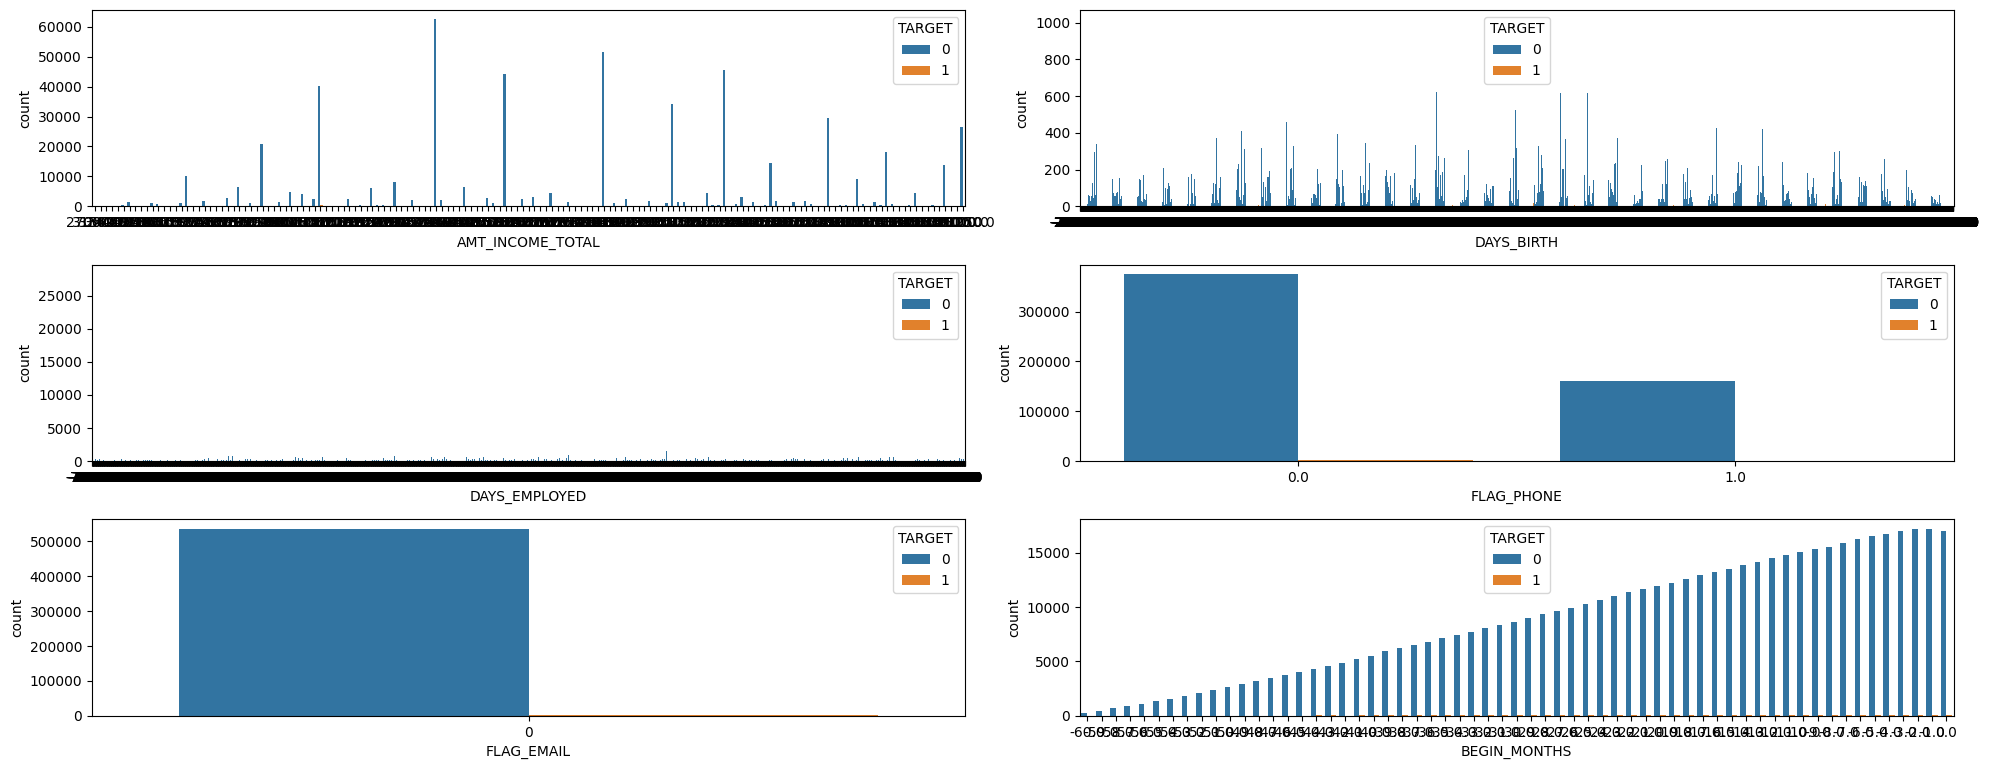

In [88]:
plt.figure(figsize=(20,15))
a=6
b=2
c=1
for i in num :
    plt.subplot(a,b,c)
    sns.countplot(data[i],hue=data["TARGET"])
    c+=1
plt.tight_layout()
plt.show()

In [ ]:
# INFERENCES :- 

In [46]:
# data.drop(["ID","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_OWN_CAR","FLAG_OWN_REALTY"],axis=1,inplace=True)

In [47]:
# data["TARGET"]=data["TARGET"].astype(object)

In [ ]:
# Checking Outliers 

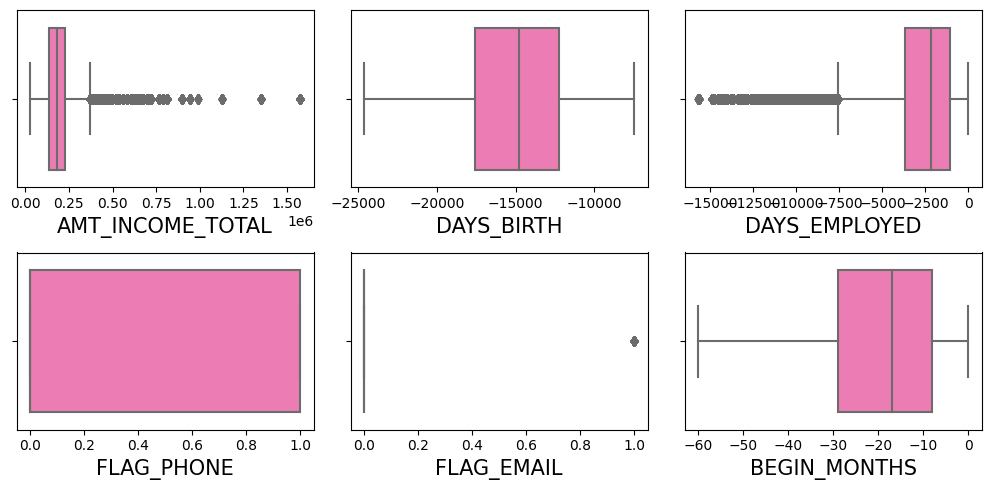

In [55]:
plt.figure(figsize=(10,5))

t=1

for i in num_cols:
    plt.subplot(2,3,t)
    sns.boxplot(data[i],color="hotpink")
    plt.xlabel(i,fontsize=15)
    t+=1
plt.tight_layout()

In [ ]:
data[data["AMT_INCOME_TOTAL"]>1.2] # Check Outliers are genuine or not so we look into these values .

In [ ]:
#outliers treatment
#based on the datasize we are removing the outliers from the data which can  

In [58]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
upper_lim=q3+(1.5*iqr)

lower_lim=q1-(1.5*iqr)
newdata=data.loc[~((data<lower_lim)|(data>upper_lim)).any(axis=1)]

In [116]:
data.head(1)

,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,F,2+ children,270000.000000,Secondary / secondary special,Married,With parents,-13258.000000,-2300.000000,0.000000,0,Managers,-6.000000,C,0


In [117]:
data['CNT_CHILDREN'].value_counts()

No children    343151
1 children     127695
2+ children     66821
Name: CNT_CHILDREN, dtype: int64

In [118]:
data["CODE_GENDER"].value_counts()

F    333832
M    203835
Name: CODE_GENDER, dtype: int64

<AxesSubplot: >

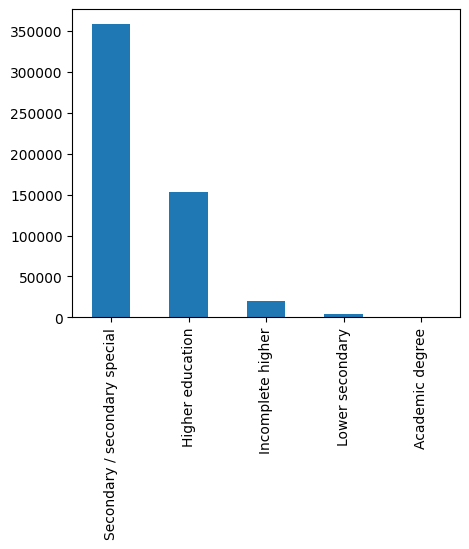

In [143]:
plt.figure(figsize=(5,4))
data["NAME_EDUCATION_TYPE"].value_counts().plot.bar()

<AxesSubplot: >

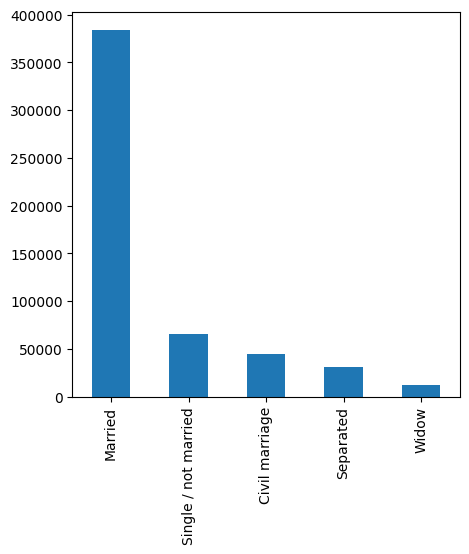

In [148]:
plt.figure(figsize=(5,5))
data['NAME_FAMILY_STATUS'].value_counts().plot.bar()

In [150]:
num_cols

Index(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE',
       'FLAG_EMAIL', 'BEGIN_MONTHS'],
      dtype='object')

In [149]:
data['DAYS_EMPLOYED'].describe()

count   537667.000000
mean     -2648.260402
std       2050.494609
min      -7577.500000
25%      -3661.000000
50%      -2147.000000
75%      -1050.000000
max        -17.000000
Name: DAYS_EMPLOYED, dtype: float64

In [153]:
data['BEGIN_MONTHS'].describe()

count   537667.000000
mean       -19.305241
std         14.037827
min        -60.000000
25%        -29.000000
50%        -17.000000
75%         -8.000000
max          0.000000
Name: BEGIN_MONTHS, dtype: float64

In [154]:
date_cols = ['BEGIN_MONTHS','DAYS_EMPLOYED']

In [155]:
 # Above columns have negative values convert them into positive
for i in date_cols:
    data[i]=abs(data[i])


In [156]:
# check 
data['BEGIN_MONTHS'].describe()

count   537667.000000
mean        19.305241
std         14.037827
min          0.000000
25%          8.000000
50%         17.000000
75%         29.000000
max         60.000000
Name: BEGIN_MONTHS, dtype: float64

# INFERENCES :- 

* clearly we can see that there are outliers specially in Amount_Income_Total,Days Employed, Flag Email.
* so we need to explore them more
* we have to do this BI VARIATE Analysis

In [ ]:
#we need to plot a pairplot for the newdata and see whats the pattern we are getting
#for best model. # as we know just by the trend of the pairplot with the target we can infer the algoritm
#whether it is  dtree or knn n so on

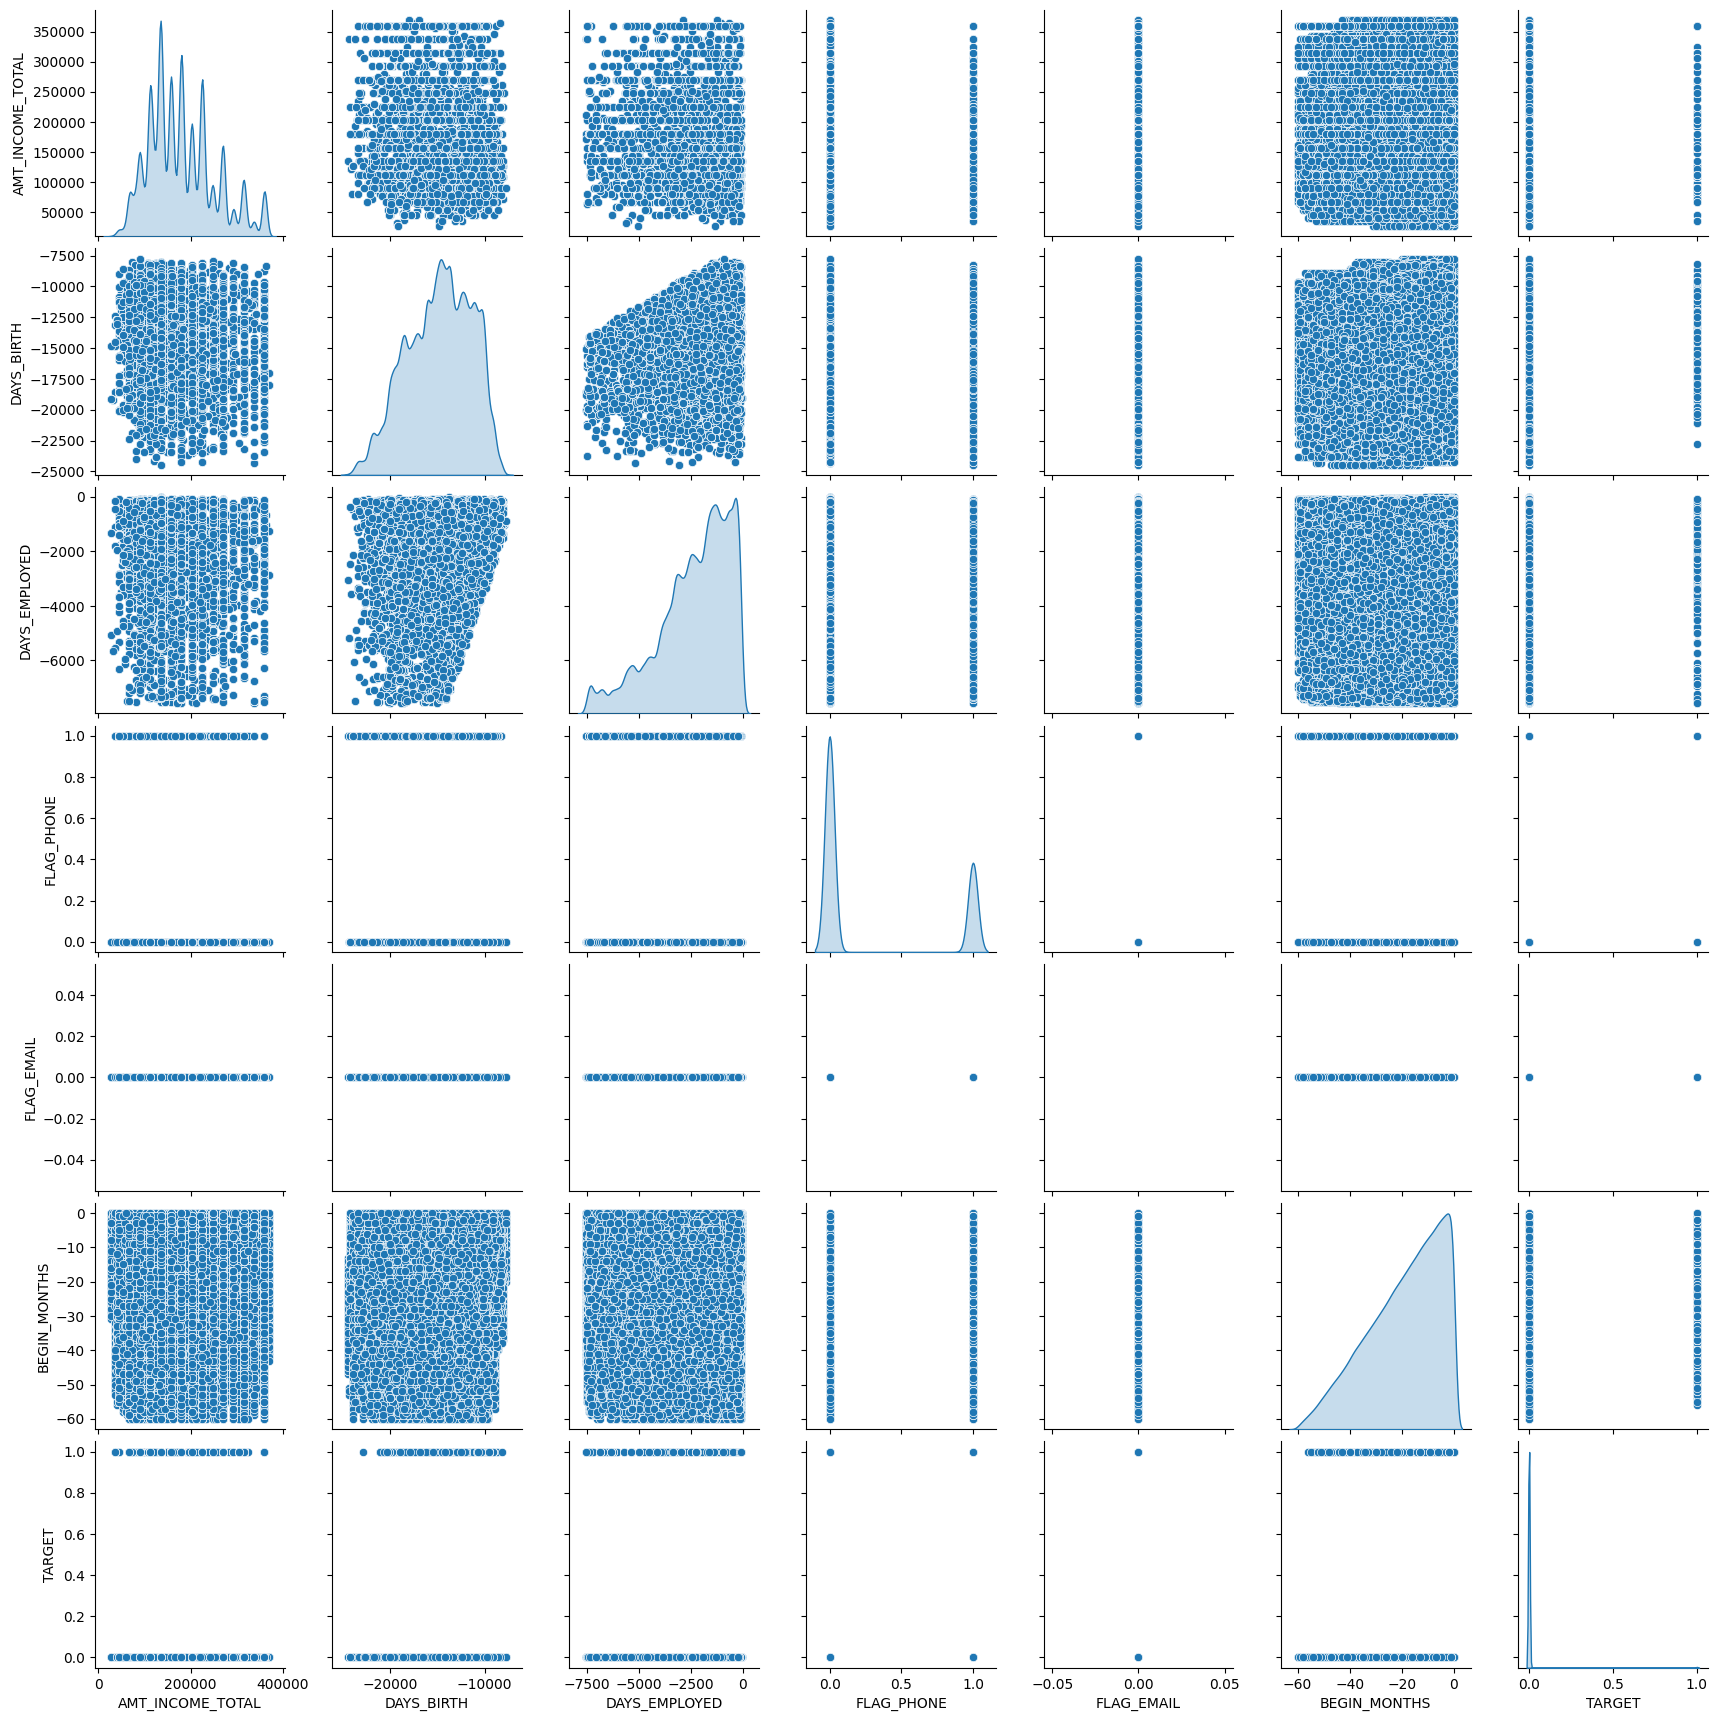

In [90]:
sns.pairplot(newdata, diag_kind='kde')  

In [125]:
newdata.shape

(434696, 14)

In [126]:
newdata.skew()


AMT_INCOME_TOTAL    0.621705
DAYS_BIRTH         -0.295329
DAYS_EMPLOYED      -0.889219
FLAG_PHONE          0.909652
FLAG_EMAIL          0.000000
BEGIN_MONTHS       -0.606943
TARGET             16.391783
dtype: float64

In [130]:
Defaulters=data[data.TARGET==1]
Repayers=data[data.TARGET==0]

<AxesSubplot: ylabel='TARGET'>

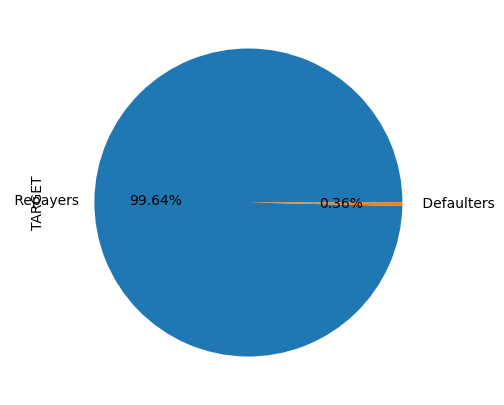

In [137]:
plt.figure(figsize=(8,5))
Defaulters=data[data.TARGET==1]
Repayers=data[data.TARGET==0]
labels = ' Repayers', ' Defaulters'
data.TARGET.value_counts().plot.pie(autopct='%1.2f%%',labels=labels)

plt.subplot(2,2,2)
(Repayers[AMT_INCOME_TOTAL].value_counts(normalize=True)*100).plot.bar(color=['black', 'red'])
plt.ylabel("Percentage")
plt.xlabel(AMT_INCOME_TOTAL)
plt.title("Repayers")

In [ ]:
(Repayers[column_name].value_counts(normalize=True)*100).plot.bar(color=['black', 'red'])
plt.ylabel("Percentage")
plt.xlabel(column_name)
plt.title("Repayers")

In [ ]:
# plt.rcParams['figure.figsize']=[10,15]

def univ_describe(column_name):
    plt.figure(figsize=(10,12))
    plt.subplot(2,2,1)
    (Defaulters[column_name].value_counts(normalize=True)*100).plot.bar(color=['blue', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("Defaulters")
    

    plt.subplot(2,2,2)
    (Repayers[column_name].value_counts(normalize=True)*100).plot.bar(color=['black', 'red'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("Repayers")
   

    plt.subplot(2,2,3)
    (data[column_name].value_counts(normalize=True)*100).plot.bar(color=['yellow', 'hotpink'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("distribution of customers")
    

    plt.subplot(2,2,4)

    per_def= data[[column_name , 'TARGET']].groupby([column_name],as_index=False).mean()
    per_def["TARGET"] = per_def["TARGET"]*100
    per_def.sort_values(by='TARGET', ascending=False, inplace=True)

    plot = plt.bar(column_name, 'TARGET',data=per_def,color=['purple', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("% defaulters ")
    plt.xticks(rotation=90)

univ_describe('TARGET')

In [ ]:
#we splitted the numerical and categorical columns seperatly

In [93]:
num=newdata.select_dtypes(include=np.number).columns
cat=newdata.select_dtypes(exclude=np.number).columns

In [94]:
num

Index(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE',
       'FLAG_EMAIL', 'BEGIN_MONTHS'],
      dtype='object')

In [95]:
cat

Index(['CODE_GENDER', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'JOB', 'STATUS', 'TARGET'],
      dtype='object')

In [ ]:
#applying robust scaler because of  pressence of outliers.

In [13]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
scaled=pd.DataFrame(rc.fit_transform(num),columns=num.columns)

In [14]:
scaled.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS
0,1.100000,0.256529,-0.117244,0.000000,0.000000,0.500000
1,-1.000000,-0.636874,0.705605,1.000000,0.000000,0.590909
2,1.100000,-0.966338,0.427043,1.000000,0.000000,0.772727
3,-0.650000,-0.101567,0.029953,0.000000,0.000000,0.636364
4,-0.350000,-0.521764,-1.519897,0.000000,0.000000,-0.545455


In [ ]:
# we used feature_engine library to encode the categorical data
#according to this we give the respective weightage to the class considering the target column with each individual class
#formula of woe is 

#log(p(X=xj|Y=1)/p(X=xj|Y=0))
#probability of class when it was defaulter / probability of class when it was non-defaulter


#why is it preffered compared to others
* we got rid of curse of dimensionality
* we gave equal importance to classes
* we considered the classes with target and then gave weightage

In [15]:
category=cat.drop("TARGET",axis=1)
from feature_engine.encoding import WoEEncoder
woe=WoEEncoder()

In [16]:
category.STATUS.unique()
#we ensured to keep beliquent a different lable so we marked them as 1 rest all 0.
#1's are the category of people that has debt due more than a month and we want 
#our model to know these beliquent customers since it is the objective of our case study

array(['C', '0', 'X', '2', '1', '5', '3', '4'], dtype=object)

In [17]:
safe=["0","C","X"]
def convert(string):
    if string in safe:
        return 0
    else:
        return 1

In [18]:
category["STATUS"]=category["STATUS"].apply(convert)

In [ ]:
#we are rudcing the classes of each category in order to have similar data point in each class


In [19]:
def child(string):
    if string=="No children":
        return "Nokid"
    else:
        return "withkids"

In [20]:
category["CNT_CHILDREN"]=category["CNT_CHILDREN"].apply(child)

In [21]:
educated=["Academic degree","Higher education","Secondary / secondary special"]
def school(string):
    if string in educated:
        return "educated"
    else:
        return "less_eduacted"
    
    

In [22]:
category["NAME_EDUCATION_TYPE"]=category["NAME_EDUCATION_TYPE"].apply(school)

In [23]:
married=["Married","Civil marriage"]
def marriage(string):
    if string in married:
        return "married"
    else:
        return "single"

In [24]:
category["NAME_FAMILY_STATUS"]=category["NAME_FAMILY_STATUS"].apply(marriage)

In [25]:
def house(string):
    
    if string=="Rented apartment":
        
        
        return "payhousebills"
    else:
        return "dont_paybills"

In [26]:
category["NAME_HOUSING_TYPE"]=category["NAME_HOUSING_TYPE"].apply(house)

In [27]:
cat['TARGET']=cat['TARGET'].astype(int)

In [28]:
good_pay=["Managers","High skill tech staff","Accountants","IT staff"]
normal_pay=["Private service staff","Secretaries","Medicine staff"]

def job(string):
    if string in good_pay:
        return "Goodpay"
    elif string in normal_pay:
        return "Normalpay"
    else:
        return "lesspay"
    

In [29]:
category["JOB"]=category["JOB"].apply(job)

In [30]:
encoded=woe.fit_transform(category,cat.TARGET)

In [32]:
encoded.shape,num.shape

((434696, 7), (434696, 6))

In [33]:
num.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS
0,270000.000000,-13258,-2300,0,0,-6
1,81000.000000,-17876,-377,1,0,-4
2,270000.000000,-19579,-1028,1,0,0
3,112500.000000,-15109,-1956,0,0,-3
4,139500.000000,-17281,-5578,0,0,-29


In [34]:
category=pd.concat([encoded,cat.TARGET],axis=1)

In [35]:
category["sn"]=np.arange(0,434696)

In [36]:
scaled["sn"]=np.arange(0,434696)

In [37]:
final_data=scaled.merge(category,on="sn",how="inner")

In [38]:
final_data.shape

(434696, 15)

In [39]:
final_data.drop("sn",axis=1,inplace=True)

In [40]:
from sklearn.model_selection import train_test_split
X=final_data.drop("TARGET",axis=1)
y=final_data.TARGET

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=10)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=10,class_weight="balanced")

In [44]:
modeltree=dtree.fit(xtrain,ytrain)

In [45]:
pred=modeltree.predict(xtest)

In [46]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix,f1_score

In [47]:
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
confusion_matrix(ytest,pred)
print("f1 score:",f1_score(ytest,pred))

recall score: 0.9761904761904762
precision score: 0.29585087191822007
f1 score: 0.4540839870789109


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,class_weight="balanced",random_state=10)
modelrfc=rfc.fit(xtrain,ytrain)
pred=modelrfc.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
confusion_matrix(ytest,pred)
print("f1 score:",f1_score(ytest,pred))

recall score: 0.9880952380952381
precision score: 0.27961819202695115
f1 score: 0.43588621444201314


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smote=SMOTE()

In [52]:
bxtrain,bytrain=smote.fit_resample(xtrain,ytrain)

In [53]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,random_state=10)
modelrfc=rfc.fit(bxtrain,bytrain)
pred=modelrfc.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.9900793650793651
precision score: 0.2803370786516854
f1 score: 0.4369527145359019
[[128624   1281]
 [     5    499]]


In [54]:
confusion_matrix(ytest,pred)


array([[128624,   1281],
       [     5,    499]], dtype=int64)

In [55]:
modelrfc.score(bxtrain,bytrain)

0.9950113954569891

In [56]:
features=pd.Series(modelrfc.feature_importances_,index=xtrain.columns).sort_values(ascending=False)

<AxesSubplot:>

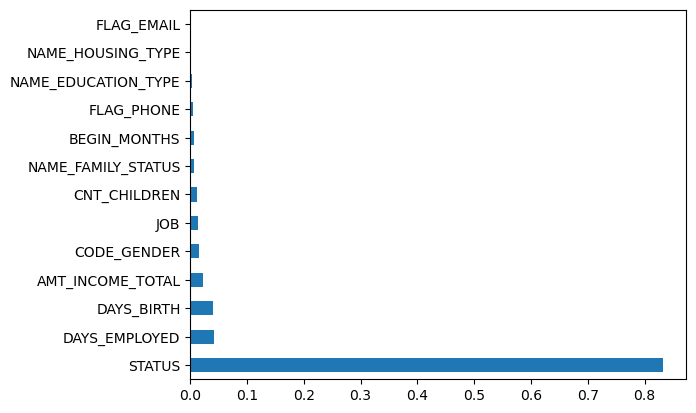

In [57]:
features.plot(kind="barh")

In [58]:
features.index

Index(['STATUS', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL',
       'CODE_GENDER', 'JOB', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS',
       'BEGIN_MONTHS', 'FLAG_PHONE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'FLAG_EMAIL'],
      dtype='object')

In [59]:
#we are taking only features that make strong impact to the target 
importantfaetures=X.drop(["FLAG_EMAIL","NAME_HOUSING_TYPE","FLAG_PHONE","NAME_EDUCATION_TYPE"],axis=1)

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(importantfaetures,y,test_size=0.30,random_state=1)

In [61]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy=0.50)

In [62]:
bxtrain,bytrain=smote.fit_resample(xtrain,ytrain)

In [63]:
bytrain.value_counts()

0    303189
1    303189
Name: TARGET, dtype: int64

In [64]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,random_state=1)
modelrfc=rfc.fit(bxtrain,bytrain)
pred=modelrfc.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.9900398406374502
precision score: 0.2712882096069869
f1 score: 0.4258783204798629
[[128572   1335]
 [     5    497]]


In [65]:
from xgboost import XGBClassifier


In [66]:
xgb= XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

In [67]:
modelxgb=xgb.fit(bxtrain,bytrain)

In [69]:
pred=modelxgb.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.9203187250996016
precision score: 0.44854368932038835
f1 score: 0.6031331592689295
[[129339    568]
 [    40    462]]


In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#creating grid
n_estimators=[100,200,300,400]
max_features=[10,11,12,14,15]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10]
max_depth=[3,5,7,10,15]
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': [10, 11, 12, 14, 15], 'max_depth': [3, 5, 7, 10, 15], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10]}


In [74]:
xgb=XGBClassifier()

In [75]:
rf_random=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,scoring="f1",n_iter=5,cv=3,random_state=10)

In [76]:
rf_random.fit(bxtrain,bytrain)

[17:57:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:57:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:58:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:58:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:59:08] WARNING: C:/build

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [77]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 11,
 'max_depth': 10}

In [78]:
pred=rf_random.predict(xtest)

In [79]:
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.8107569721115537
precision score: 0.7551020408163265
f1 score: 0.781940441882805
[[129775    132]
 [    95    407]]


In [80]:
rf_random.best_score_

0.9991097657202627

#### taking time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid={'n_estimators':range(100,200,2),
            'max_depth':range(3,8),
            'min_samples_split':range(2,10,2)}

cv=StratifiedKFold(n_splits=5,shuffle=False)
model=GridSearchCV(RandomForestClassifier(),param_grid,scoring="f1",n_jobs=-1,cv=cv)
model.fit(bxtrain,bytrain)
model.best_params_
model.best_score_
model=model.best_estimator_
pred=model.predict(xtest)
print("recall score",recall_score(ytest,pred))
print("precision score",precision_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("f1_score",f1_score(ytest,pred))

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
#checking for best mdoel evaluation
def models_eval():
    models,names=[],[]
    models.append(LogisticRegression())
    names.append("lr")
    
    models.append(GaussianNB())
    names.append("nvb")
    
    models.append(KNeighborsClassifier())
    names.append("knn")
    
    models.append(DecisionTreeClassifier())
    names.append("dtree")
    
    models.append(RandomForestClassifier())
    names.append("rfc")
    
    models.append(AdaBoostClassifier())
    names.append("ada")
    
    models.append(GradientBoostingClassifier())
    names.append("gbc")
    
    models.append(XGBClassifier())
    names.append("xgb")
    
    return models,names

In [91]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import StratifiedKFold

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
def evaluation(X,y):
    models,names=models_eval()
    results=[]
    
    for i in range(len(models)):
        cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=5,random_state=10)
        scores=cross_val_score(models[i],X,y,scoring="f1",cv=cv)
        results.append(scores)
    
    plt.boxplot(results,labels=names,showmeans=True)

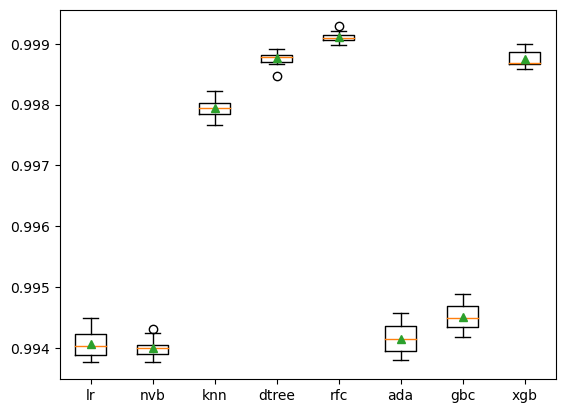

In [94]:
evaluation(bxtrain,bytrain)

In [101]:
bxtrain.columns

Index(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'BEGIN_MONTHS',
       'CODE_GENDER', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'JOB', 'STATUS'],
      dtype='object')

In [102]:
# final model
#using random forest classifier hyperparamter tuning
n_estimators=[100,200,300,400,500]
max_features=[1,2,3,4,5,6,7,8,9]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15,20]
max_depth=[3,5,7,10,15,20,25,30]
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [3, 5, 7, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}


In [103]:
rfc=RandomForestClassifier()

In [104]:
rf_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring="f1",n_iter=5,cv=3,random_state=10)

In [105]:
rf_random.fit(bxtrain,bytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 7, 10, 15, 20, 25,
                                                      30],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=10, scoring='f1')

In [106]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': 25}

In [109]:
rf_random.best_score_

0.9981788968152164

In [107]:
pred=rf_random.predict(xtest)

In [108]:
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.8725099601593626
precision score: 0.5296251511487303
f1 score: 0.6591422121896162
[[129518    389]
 [    64    438]]
